In [1]:
# Initial imports

import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# Imports for better visualization

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/usr/local/lib/python2.7/dist-packages/matplotlib-2.0.0b1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:895: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Load training data
train_data = pd.read_csv('Dataset/Train.csv')

In [4]:
# Load testing data
test_data = pd.read_csv('Dataset/Test.csv')

In [5]:
train_data.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall
0,3311712,12,01-09-1990,194.0,37.24,60.8,15.2,92.1300,8225.0,8259.0,8211.0,92.0,304.0,255.0,288.0,222.0,3,1406
1,3311812,12,02-09-1990,285.0,32.68,60.8,7.6,14.1100,8232.0,8280.0,8205.0,172.0,332.0,252.0,297.0,204.0,3,1409
2,3311912,12,03-09-1990,319.0,43.32,60.8,15.2,35.6900,8321.0,8355.0,8283.0,236.0,292.0,219.0,279.0,165.0,3,1386
3,3312012,12,04-09-1990,297.0,25.84,38.0,7.6,0.0249,8379.0,8396.0,8358.0,272.0,324.0,225.0,261.0,192.0,3,1365
4,3312112,12,05-09-1990,207.0,28.88,45.6,7.6,0.8300,8372.0,8393.0,8335.0,236.0,332.0,234.0,273.0,183.0,3,1413


In [6]:
test_data.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type
0,3725712,12,01-01-2002,233.0,55.48,76.0,38.0,0.0249,8259.0,8300.0,8211.0,260.0,316.0,243.0,285.0,210.0,3
1,3725812,12,02-01-2002,211.0,108.68,152.0,60.8,154.3800,8208.0,8294.0,8136.0,120.0,280.0,252.0,291.0,201.0,3
2,3725912,12,03-01-2002,237.0,95.76,121.6,83.6,34.8600,8252.0,8304.0,8146.0,236.0,292.0,234.0,270.0,207.0,3
3,3726012,12,04-01-2002,286.0,101.08,129.2,83.6,34.0300,8146.0,8249.0,8092.0,204.0,284.0,228.0,264.0,201.0,3
4,3726112,12,05-01-2002,281.0,63.08,83.6,45.6,4.9800,8341.0,8376.0,8259.0,144.0,316.0,237.0,279.0,213.0,3


In [7]:
train_data.shape

(114539, 18)

In [8]:
train_data.isnull().any()

ID                              False
Park_ID                         False
Date                            False
Direction_Of_Wind                True
Average_Breeze_Speed             True
Max_Breeze_Speed                 True
Min_Breeze_Speed                 True
Var1                             True
Average_Atmospheric_Pressure     True
Max_Atmospheric_Pressure         True
Min_Atmospheric_Pressure         True
Min_Ambient_Pollution            True
Max_Ambient_Pollution            True
Average_Moisture_In_Park         True
Max_Moisture_In_Park             True
Min_Moisture_In_Park             True
Location_Type                   False
Footfall                        False
dtype: bool

In [9]:
test_data.shape

(39420, 17)

In [10]:
test_data.isnull().any()

ID                              False
Park_ID                         False
Date                            False
Direction_Of_Wind                True
Average_Breeze_Speed             True
Max_Breeze_Speed                 True
Min_Breeze_Speed                 True
Var1                             True
Average_Atmospheric_Pressure     True
Max_Atmospheric_Pressure         True
Min_Atmospheric_Pressure         True
Min_Ambient_Pollution            True
Max_Ambient_Pollution            True
Average_Moisture_In_Park         True
Max_Moisture_In_Park             True
Min_Moisture_In_Park             True
Location_Type                   False
dtype: bool

In [11]:
data = train_data.append(test_data, ignore_index=True)

In [12]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Location_Type,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,Max_Moisture_In_Park,Min_Ambient_Pollution,Min_Atmospheric_Pressure,Min_Breeze_Speed,Min_Moisture_In_Park,Park_ID,Var1
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,3,304.0,8259.0,60.8,288.0,92.0,8211.0,15.2,222.0,12,92.1300
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,3,332.0,8280.0,60.8,297.0,172.0,8205.0,7.6,204.0,12,14.1100
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,3,292.0,8355.0,60.8,279.0,236.0,8283.0,15.2,165.0,12,35.6900
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,3,324.0,8396.0,38.0,261.0,272.0,8358.0,7.6,192.0,12,0.0249
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,3,332.0,8393.0,45.6,273.0,236.0,8335.0,7.6,183.0,12,0.8300


In [13]:
data.shape

(153959, 18)

In [14]:
data.dtypes

Average_Atmospheric_Pressure    float64
Average_Breeze_Speed            float64
Average_Moisture_In_Park        float64
Date                             object
Direction_Of_Wind               float64
Footfall                        float64
ID                                int64
Location_Type                     int64
Max_Ambient_Pollution           float64
Max_Atmospheric_Pressure        float64
Max_Breeze_Speed                float64
Max_Moisture_In_Park            float64
Min_Ambient_Pollution           float64
Min_Atmospheric_Pressure        float64
Min_Breeze_Speed                float64
Min_Moisture_In_Park            float64
Park_ID                           int64
Var1                            float64
dtype: object

In [15]:
data['Footfall'].fillna(0, inplace=True)

In [16]:
data.isnull().any()

Average_Atmospheric_Pressure     True
Average_Breeze_Speed             True
Average_Moisture_In_Park         True
Date                            False
Direction_Of_Wind                True
Footfall                        False
ID                              False
Location_Type                   False
Max_Ambient_Pollution            True
Max_Atmospheric_Pressure         True
Max_Breeze_Speed                 True
Max_Moisture_In_Park             True
Min_Ambient_Pollution            True
Min_Atmospheric_Pressure         True
Min_Breeze_Speed                 True
Min_Moisture_In_Park             True
Park_ID                         False
Var1                             True
dtype: bool

In [17]:
data_locations = pd.get_dummies(data['Location_Type'], prefix='location')

data = pd.concat([data.drop(['Location_Type'], axis=1), data_locations], axis=1)

In [18]:
data.head()

,Average_Atmospheric_Pressure,Average_Breeze_Speed,Average_Moisture_In_Park,Date,Direction_Of_Wind,Footfall,ID,Max_Ambient_Pollution,Max_Atmospheric_Pressure,Max_Breeze_Speed,...,Min_Ambient_Pollution,Min_Atmospheric_Pressure,Min_Breeze_Speed,Min_Moisture_In_Park,Park_ID,Var1,location_1,location_2,location_3,location_4
0,8225.0,37.24,255.0,01-09-1990,194.0,1406.0,3311712,304.0,8259.0,60.8,...,92.0,8211.0,15.2,222.0,12,92.1300,0.0,0.0,1.0,0.0
1,8232.0,32.68,252.0,02-09-1990,285.0,1409.0,3311812,332.0,8280.0,60.8,...,172.0,8205.0,7.6,204.0,12,14.1100,0.0,0.0,1.0,0.0
2,8321.0,43.32,219.0,03-09-1990,319.0,1386.0,3311912,292.0,8355.0,60.8,...,236.0,8283.0,15.2,165.0,12,35.6900,0.0,0.0,1.0,0.0
3,8379.0,25.84,225.0,04-09-1990,297.0,1365.0,3312012,324.0,8396.0,38.0,...,272.0,8358.0,7.6,192.0,12,0.0249,0.0,0.0,1.0,0.0
4,8372.0,28.88,234.0,05-09-1990,207.0,1413.0,3312112,332.0,8393.0,45.6,...,236.0,8335.0,7.6,183.0,12,0.8300,0.0,0.0,1.0,0.0


In [19]:
data['Var1'].dropna().describe()

count    142757.000000
mean         18.680243
std          37.983644
min           0.000000
25%           0.000000
50%           0.830000
75%          21.580000
max        1181.090000
Name: Var1, dtype: float64

(0, 2000)

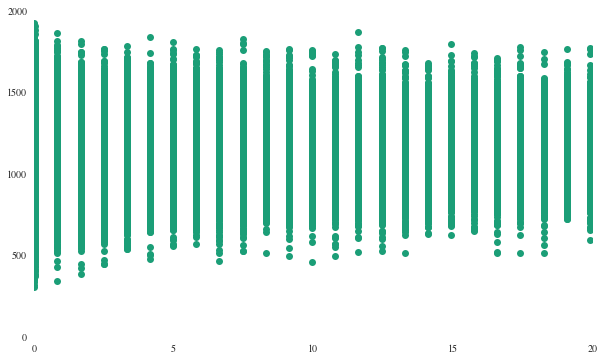

In [20]:
plt.scatter(train_data['Var1'], train_data['Footfall'])
plt.xlim([0, 20])
plt.ylim([0, 2000])

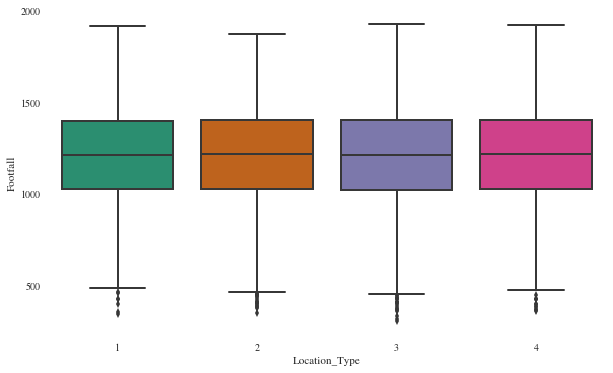

In [21]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Location_Type'])

In [22]:
data['Park_ID'].value_counts()

39    5600
26    5600
13    5600
14    5600
15    5600
16    5600
18    5600
20    5600
21    5600
22    5600
23    5600
24    5600
38    5600
25    5600
27    5600
28    5600
29    5600
30    5600
31    5600
32    5600
33    5600
34    5600
35    5600
36    5600
37    5600
12    5600
17    5358
19    3001
Name: Park_ID, dtype: int64

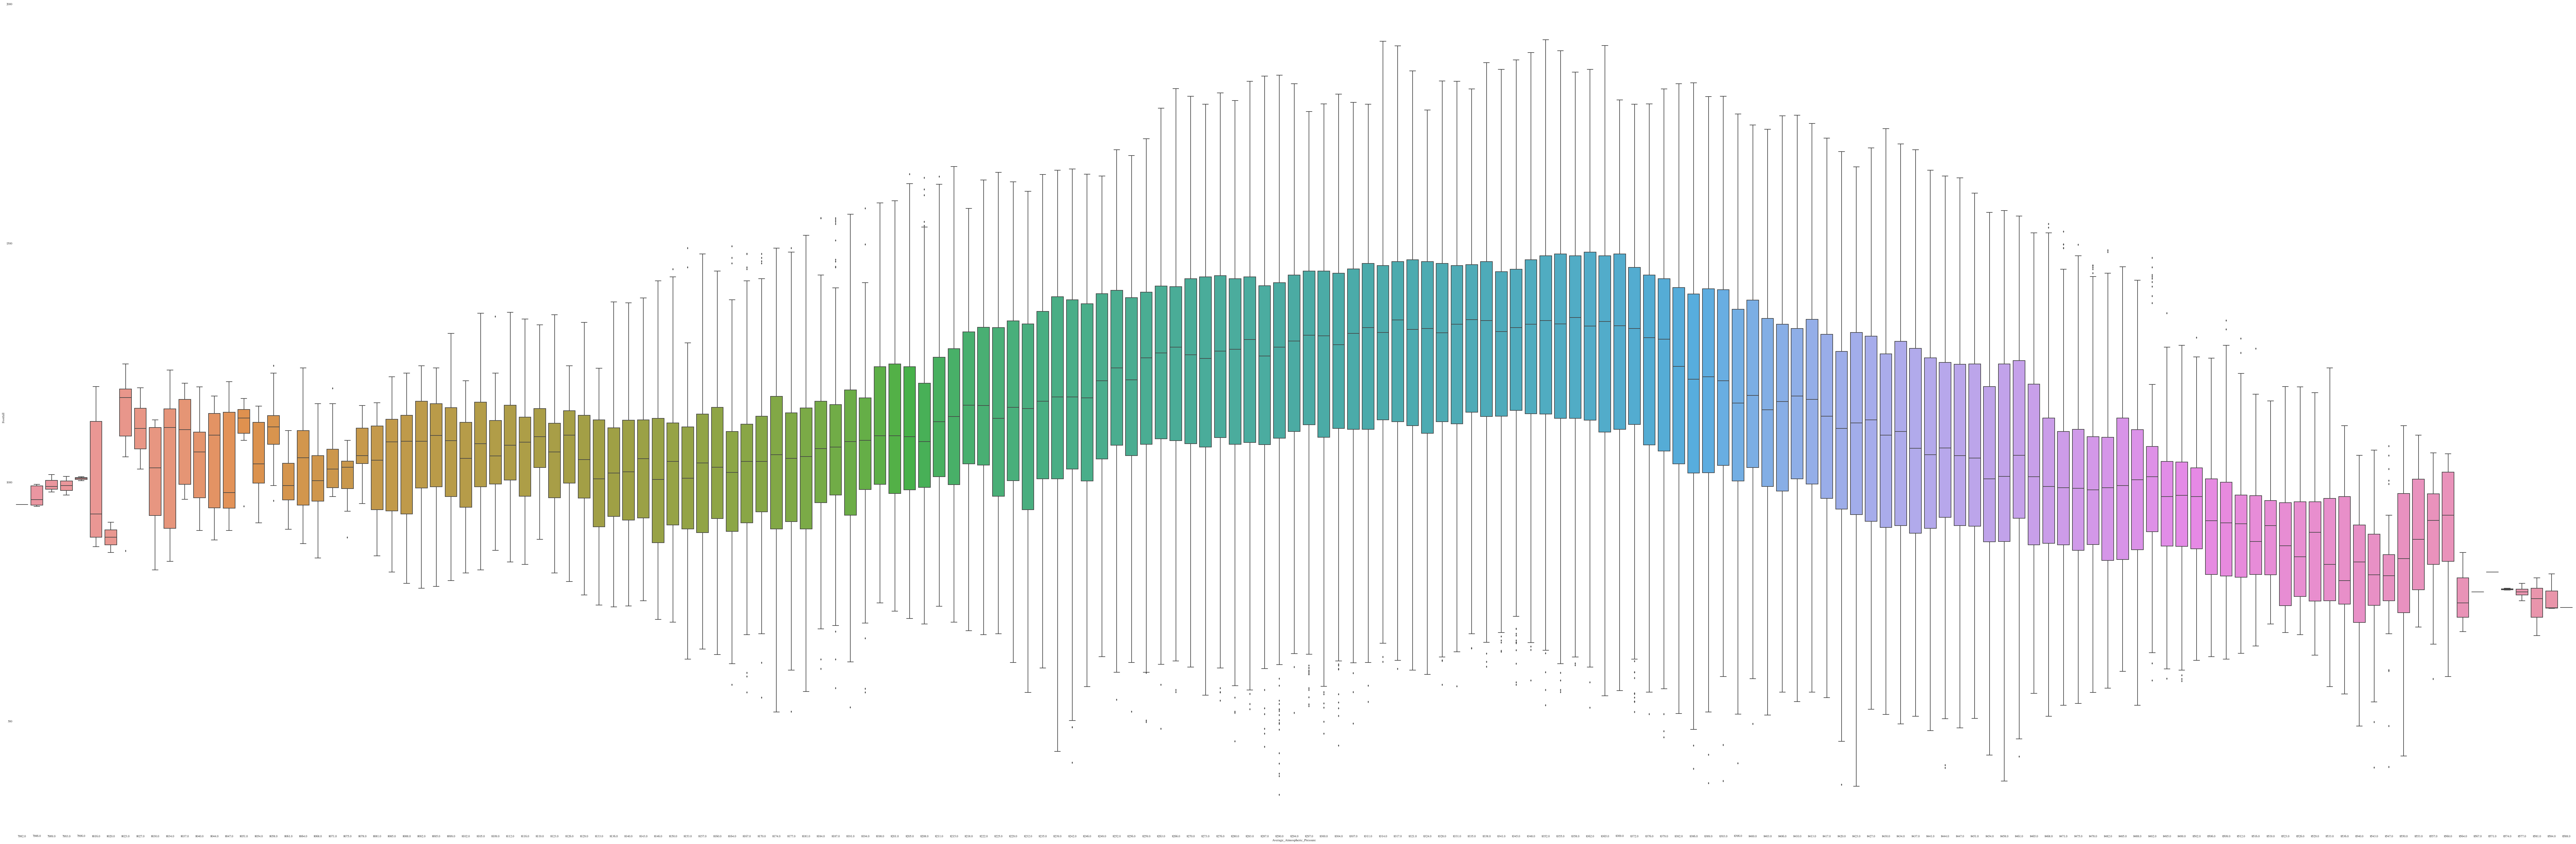

In [23]:
dims = (150,50)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(y=train_data['Footfall'], x=train_data['Average_Atmospheric_Pressure'])

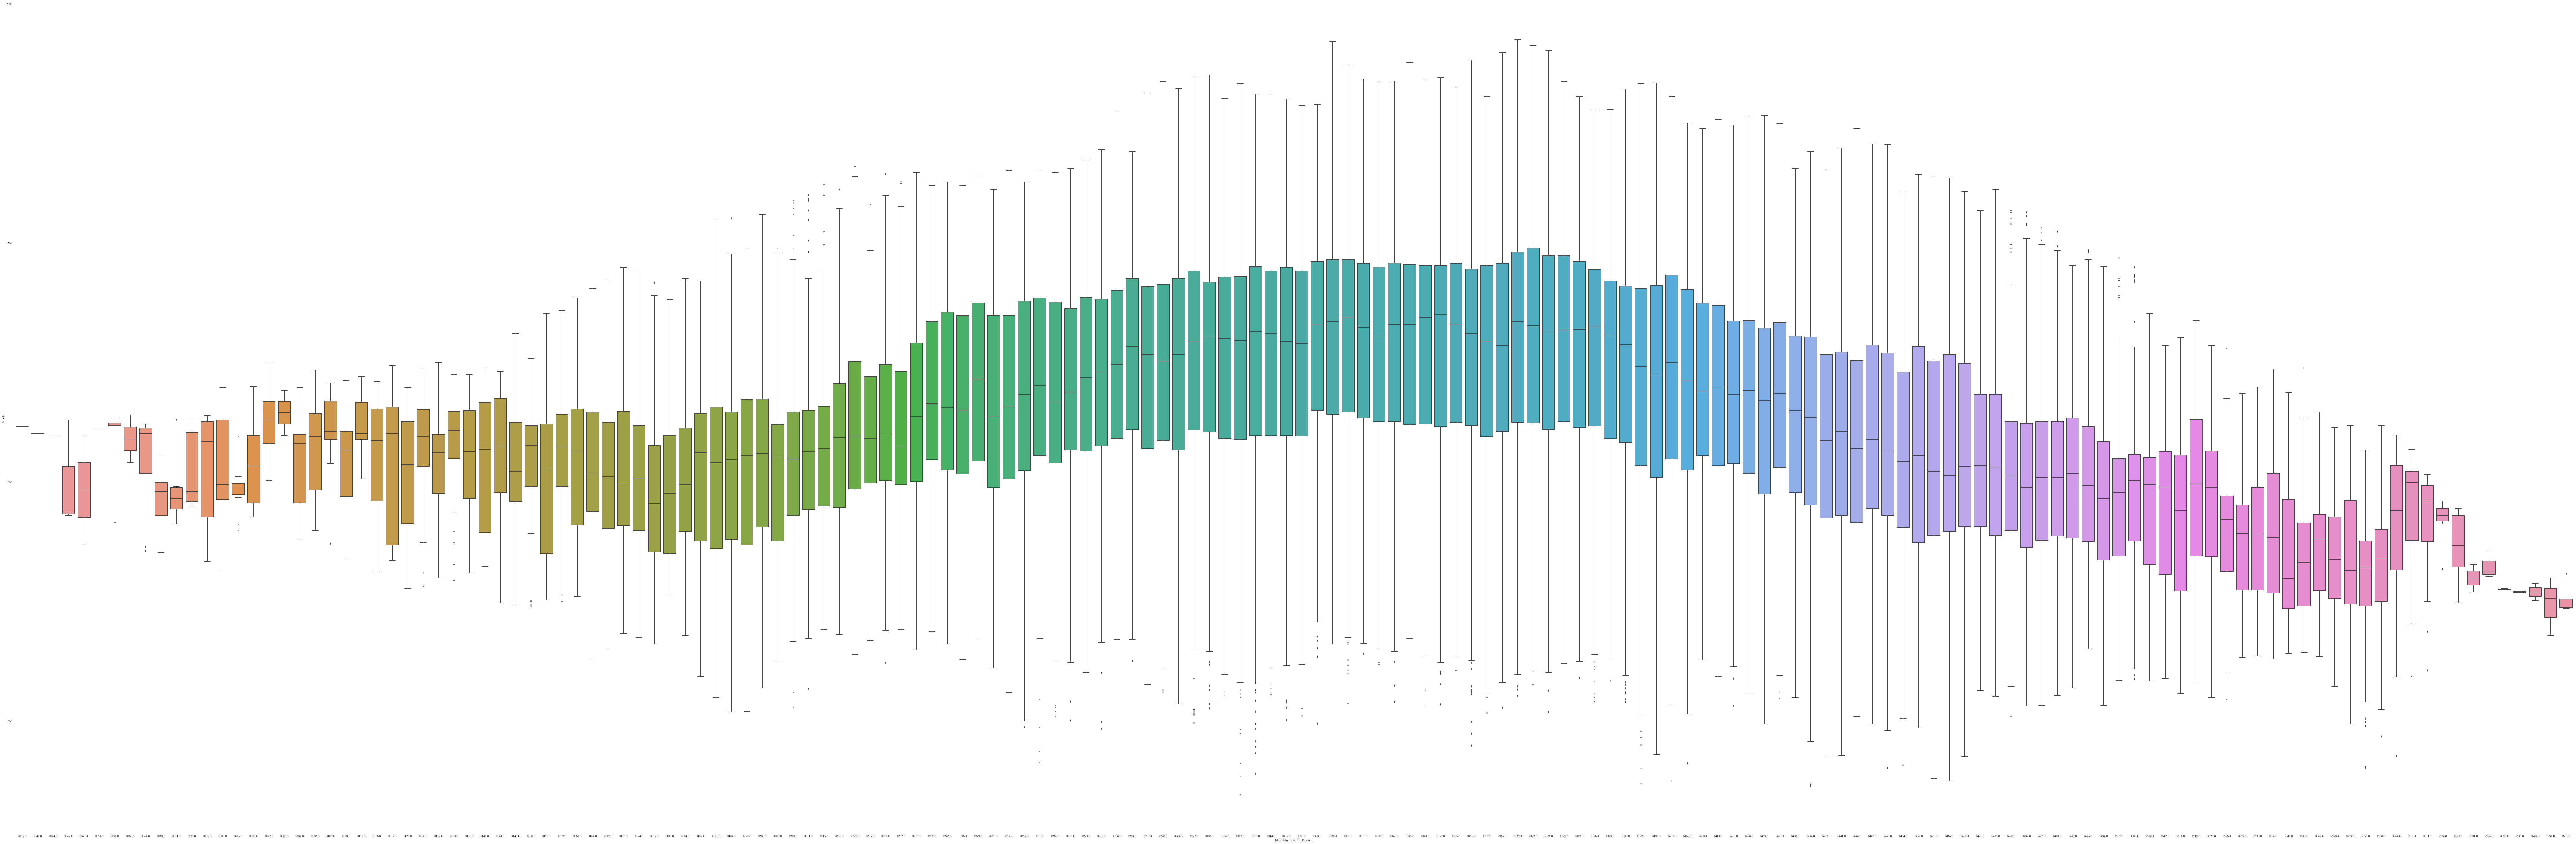

In [24]:
dims = (150,50)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(y=train_data['Footfall'], x=train_data['Max_Atmospheric_Pressure'])

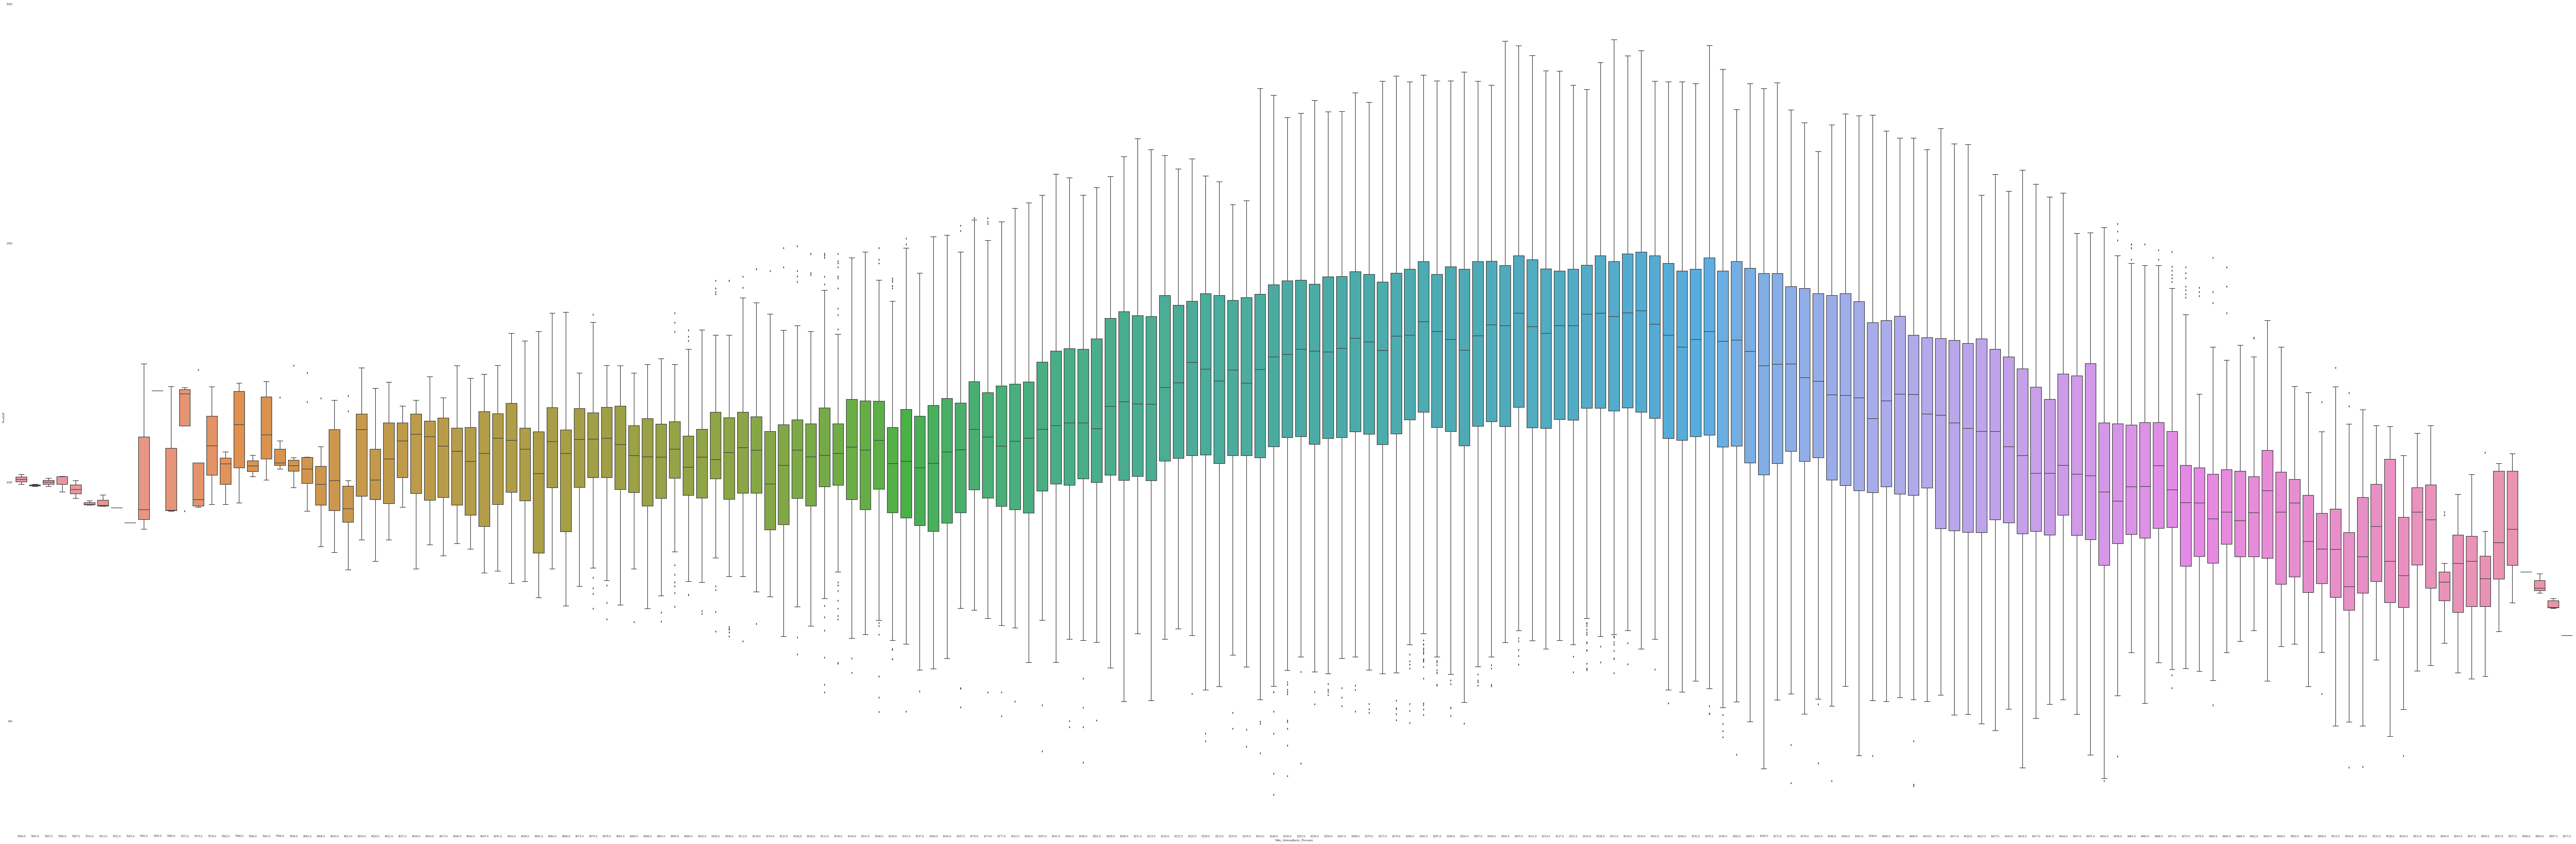

In [25]:
dims = (150,50)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(y=train_data['Footfall'], x=train_data['Min_Atmospheric_Pressure'])

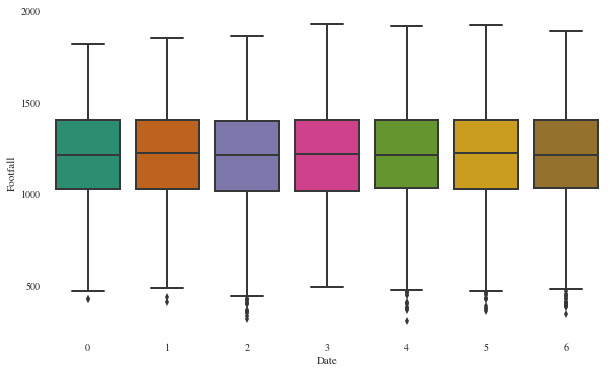

In [26]:
sns.boxplot(y=train_data['Footfall'], x=pd.to_datetime(train_data['Date'], format='%d-%m-%Y').dt.weekday)

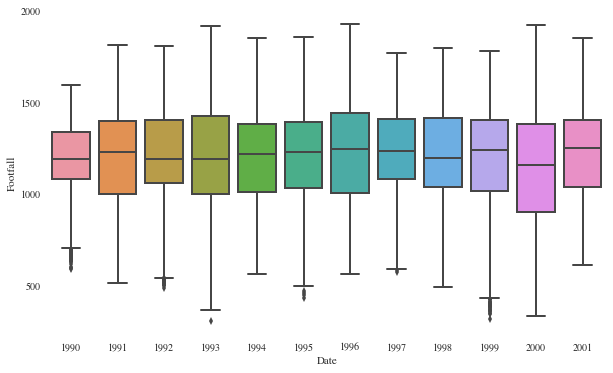

In [27]:
sns.boxplot(y=train_data['Footfall'], x=pd.to_datetime(train_data['Date'], format='%d-%m-%Y').dt.year)

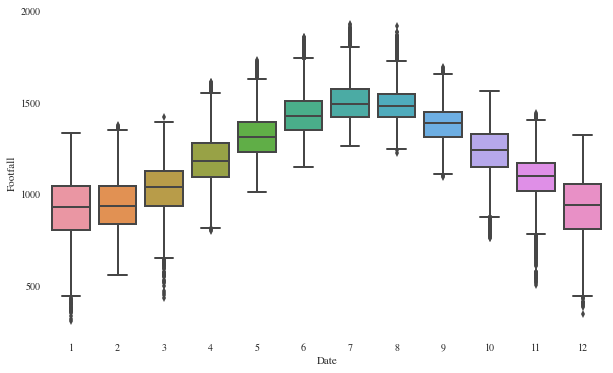

In [28]:
sns.boxplot(y=train_data['Footfall'], x=pd.to_datetime(train_data['Date'], format='%d-%m-%Y').dt.month)

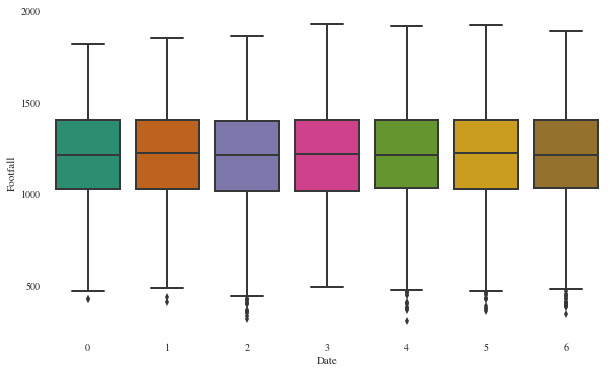

In [29]:
sns.boxplot(y=train_data['Footfall'], x=pd.to_datetime(train_data['Date'], format='%d-%m-%Y').dt.dayofweek)

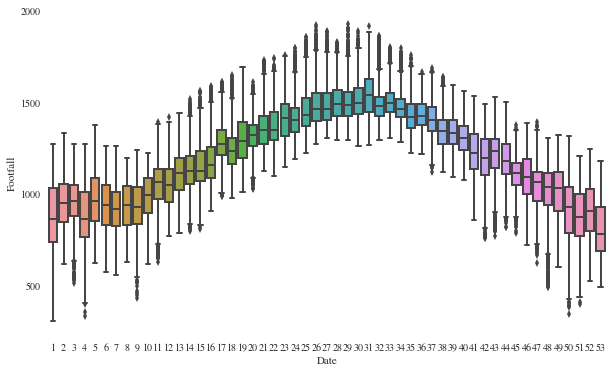

In [30]:
sns.boxplot(y=train_data['Footfall'], x=pd.to_datetime(train_data['Date'], format='%d-%m-%Y').dt.weekofyear)

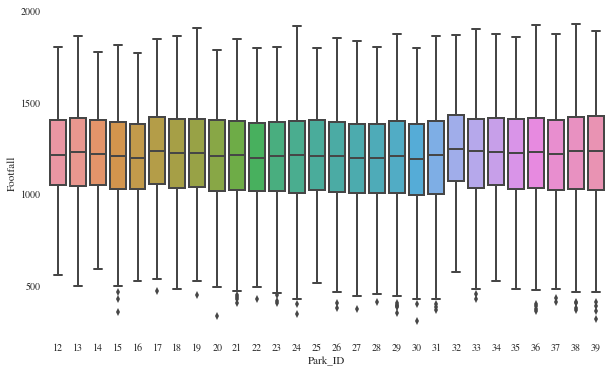

In [31]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Park_ID'])

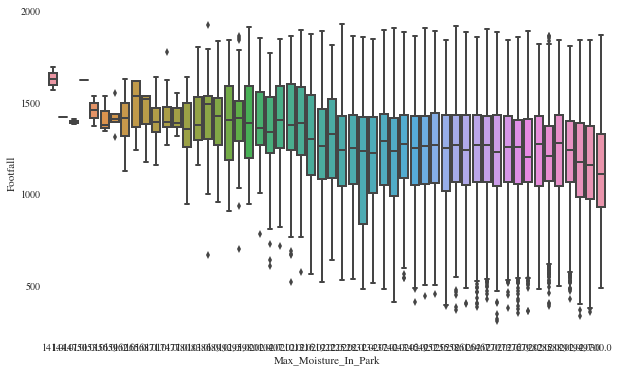

In [32]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Max_Moisture_In_Park'])

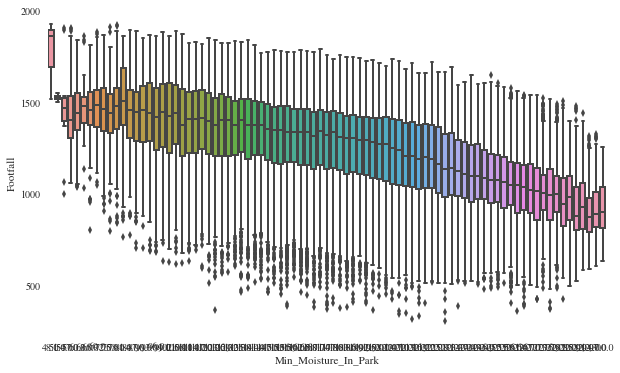

In [33]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Min_Moisture_In_Park'])

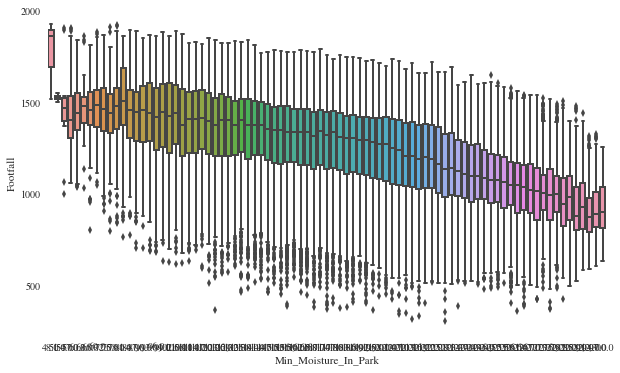

In [34]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Min_Moisture_In_Park'])

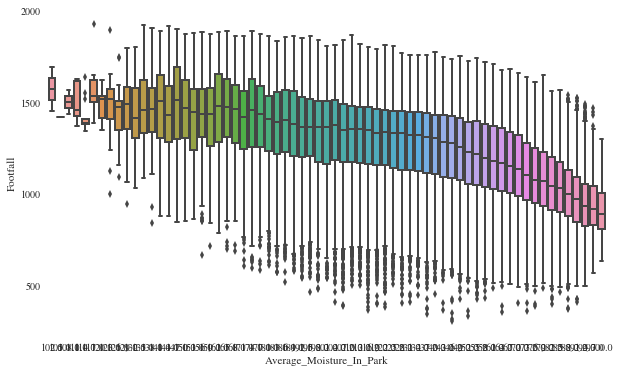

In [35]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Average_Moisture_In_Park'])

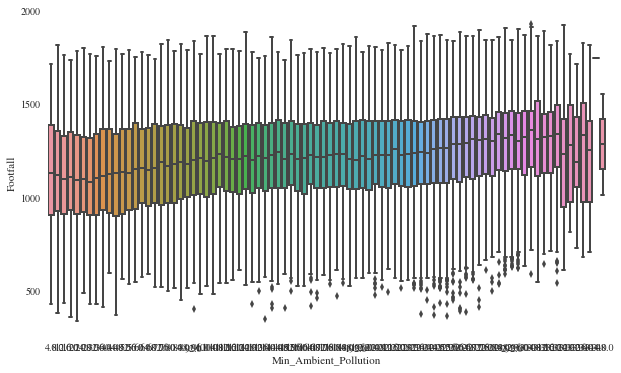

In [36]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Min_Ambient_Pollution'])

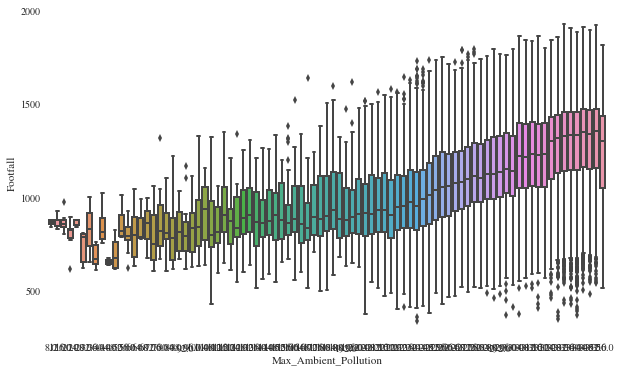

In [37]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Max_Ambient_Pollution'])

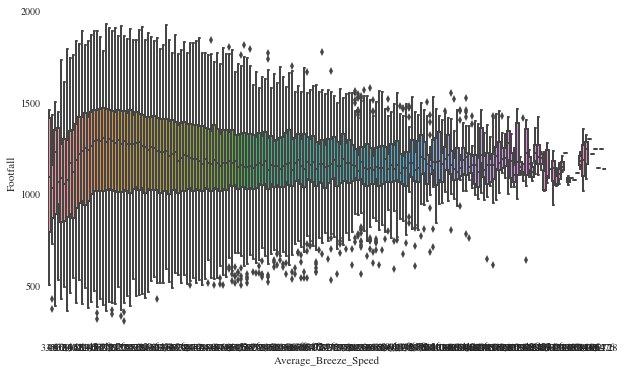

In [38]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Average_Breeze_Speed'])

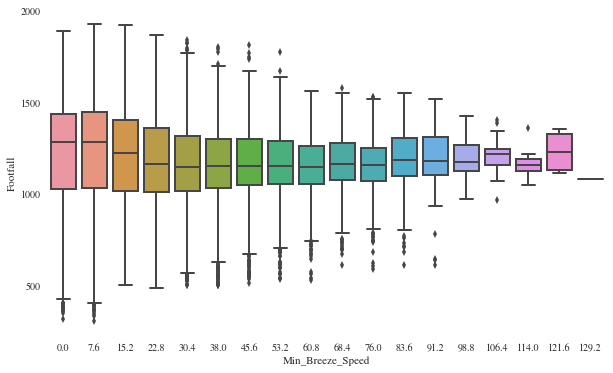

In [39]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Min_Breeze_Speed'])

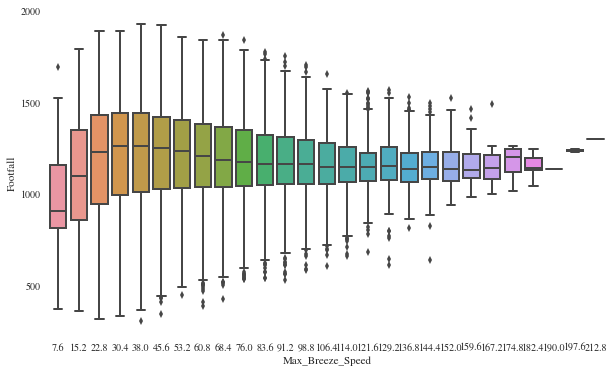

In [40]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Max_Breeze_Speed'])

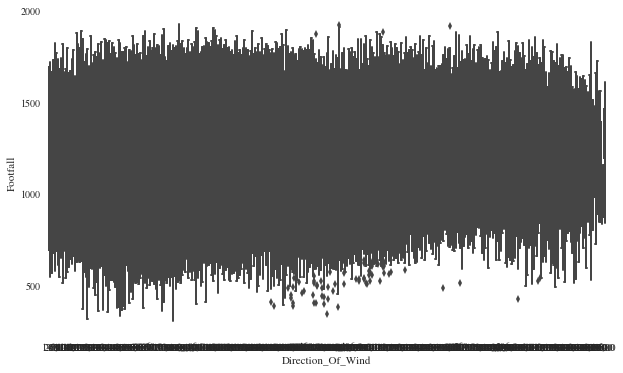

In [41]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Direction_Of_Wind'])

In [42]:
# Check for null values in Atmpospheric_Pressure

In [43]:
data['Average_Atmospheric_Pressure'].isnull().value_counts()

False    100591
True      53368
Name: Average_Atmospheric_Pressure, dtype: int64

In [44]:
data['Max_Atmospheric_Pressure'].isnull().value_counts()

False    100591
True      53368
Name: Max_Atmospheric_Pressure, dtype: int64

In [45]:
data['Min_Atmospheric_Pressure'].isnull().value_counts()

False    100591
True      53368
Name: Min_Atmospheric_Pressure, dtype: int64

In [46]:
# Check for null values in Breeze_Speed

In [47]:
data['Average_Breeze_Speed'].isnull().value_counts()

False    148535
True       5424
Name: Average_Breeze_Speed, dtype: int64

In [48]:
data['Max_Breeze_Speed'].isnull().value_counts()

False    148530
True       5429
Name: Max_Breeze_Speed, dtype: int64

In [49]:
data['Min_Breeze_Speed'].isnull().value_counts()

False    148532
True       5427
Name: Min_Breeze_Speed, dtype: int64

In [50]:
# Check for null values in Moisture_In_Park

In [51]:
data['Average_Moisture_In_Park'].isnull().value_counts()

False    153880
True         79
Name: Average_Moisture_In_Park, dtype: int64

In [52]:
data['Max_Moisture_In_Park'].isnull().value_counts()

False    153880
True         79
Name: Max_Moisture_In_Park, dtype: int64

In [53]:
data['Min_Moisture_In_Park'].isnull().value_counts()

False    153880
True         79
Name: Min_Moisture_In_Park, dtype: int64

In [54]:
# Check for null values in Direction_Of_Wind

In [55]:
data['Direction_Of_Wind'].isnull().value_counts()

False    148535
True       5424
Name: Direction_Of_Wind, dtype: int64

In [56]:
# Check for null values in Ambient_Pollution

In [57]:
data['Max_Ambient_Pollution'].isnull().value_counts()

False    112659
True      41300
Name: Max_Ambient_Pollution, dtype: int64

In [58]:
data['Min_Ambient_Pollution'].isnull().value_counts()

False    112659
True      41300
Name: Min_Ambient_Pollution, dtype: int64

In [59]:
# Check for null values in Var1

In [60]:
data['Var1'].isnull().value_counts()

False    142757
True      11202
Name: Var1, dtype: int64

In [61]:
data['Var1'].dropna().describe()

count    142757.000000
mean         18.680243
std          37.983644
min           0.000000
25%           0.000000
50%           0.830000
75%          21.580000
max        1181.090000
Name: Var1, dtype: float64

In [62]:
def prepare_data(df, is_train):
    df['Average_Breeze_Speed'].fillna(np.median(data['Average_Breeze_Speed'].dropna()), inplace=True)
    df['Min_Breeze_Speed'].fillna(np.median(data['Min_Breeze_Speed'].dropna()), inplace=True)
    df['Max_Breeze_Speed'].fillna(np.median(data['Max_Breeze_Speed'].dropna()), inplace=True)
    df['Direction_Of_Wind'].fillna(np.median(data['Direction_Of_Wind'].dropna()), inplace=True)
    df_locations = pd.get_dummies(df['Location_Type'], prefix='location')
    df = pd.concat([df.drop(['Location_Type'], axis=1), df_locations], axis=1)
    df.drop(['location_4'], axis=1, inplace=True)
    df['Average_Atmospheric_Pressure'].fillna(np.median(data['Average_Atmospheric_Pressure'].dropna()), inplace=True)
    df['Average_Atmospheric_Pressure'] = np.abs(df['Average_Atmospheric_Pressure'] - 8290)
    df['Max_Atmospheric_Pressure'].fillna(np.median(data['Max_Atmospheric_Pressure'].dropna()), inplace=True)
    df['Max_Atmospheric_Pressure'] = np.abs(df['Max_Atmospheric_Pressure'] - 8360)
    df['Min_Atmospheric_Pressure'].fillna(np.median(data['Min_Atmospheric_Pressure'].dropna()), inplace=True)
    df['Max_Atmospheric_Pressure'] = np.abs(df['Min_Atmospheric_Pressure'] - 8260)
    df['Average_Moisture_In_Park'].fillna(np.median(data['Average_Moisture_In_Park'].dropna()), inplace=True)
    df['Max_Moisture_In_Park'].fillna(np.median(data['Max_Moisture_In_Park'].dropna()), inplace=True)
    df['Min_Moisture_In_Park'].fillna(np.median(data['Min_Moisture_In_Park'].dropna()), inplace=True)
    df['Max_Ambient_Pollution'].fillna(np.median(data['Max_Ambient_Pollution'].dropna()), inplace=True)
    df['Min_Ambient_Pollution'].fillna(np.median(data['Min_Ambient_Pollution'].dropna()), inplace=True)
    df['Var1'].fillna(np.median(data['Var1'].dropna()), inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df['weekday'] = df['Date'].dt.dayofweek
    df_weekdays = pd.get_dummies(df['weekday'], prefix='weekday')
    df = pd.concat([df.drop(['weekday'], axis=1), df_weekdays], axis=1)
    df.drop(['weekday_0'], axis=1, inplace=True)
    df['week'] = df['Date'].dt.weekofyear
    df['week'] = np.abs(df['week'] - 31)
    df['month'] = df['Date'].dt.month
    df['month'] = np.abs(df['month'] - 7)
#     df_months = pd.get_dummies(df['month'], prefix='month')
#     df = pd.concat([df.drop(['month'], axis=1), df_months], axis=1)
#     df.drop(['month_12'], axis=1, inplace=True)
    df_parks = pd.get_dummies(df['Park_ID'], prefix='park')
    df = pd.concat([df.drop(['Park_ID'], axis=1), df_parks], axis=1)
    if is_train:
        df.drop(['park_19'], axis=1, inplace=True)
        return df.drop(['ID', 'Footfall', 'Date'], axis=1), df['Footfall']
    return df.drop(['ID', 'Date'], axis=1)

In [63]:
train_features, train_target = prepare_data(train_data, 1)

In [64]:
test_features = prepare_data(test_data, 0)

In [65]:
train_features.isnull().any()

Direction_Of_Wind               False
Average_Breeze_Speed            False
Max_Breeze_Speed                False
Min_Breeze_Speed                False
Var1                            False
Average_Atmospheric_Pressure    False
Max_Atmospheric_Pressure        False
Min_Atmospheric_Pressure        False
Min_Ambient_Pollution           False
Max_Ambient_Pollution           False
Average_Moisture_In_Park        False
Max_Moisture_In_Park            False
Min_Moisture_In_Park            False
location_1                      False
location_2                      False
location_3                      False
weekday_1                       False
weekday_2                       False
weekday_3                       False
weekday_4                       False
weekday_5                       False
weekday_6                       False
week                            False
month                           False
park_12                         False
park_13                         False
park_14     

In [66]:
train_features.head()

,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,...,park_30,park_31,park_32,park_33,park_34,park_35,park_36,park_37,park_38,park_39
0,194.0,37.24,60.8,15.2,92.1300,65.0,49.0,8211.0,92.0,304.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,285.0,32.68,60.8,7.6,14.1100,58.0,55.0,8205.0,172.0,332.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,319.0,43.32,60.8,15.2,35.6900,31.0,23.0,8283.0,236.0,292.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,297.0,25.84,38.0,7.6,0.0249,89.0,98.0,8358.0,272.0,324.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,207.0,28.88,45.6,7.6,0.8300,82.0,75.0,8335.0,236.0,332.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
train_features.columns

Index([u'Direction_Of_Wind', u'Average_Breeze_Speed', u'Max_Breeze_Speed',
       u'Min_Breeze_Speed', u'Var1', u'Average_Atmospheric_Pressure',
       u'Max_Atmospheric_Pressure', u'Min_Atmospheric_Pressure',
       u'Min_Ambient_Pollution', u'Max_Ambient_Pollution',
       u'Average_Moisture_In_Park', u'Max_Moisture_In_Park',
       u'Min_Moisture_In_Park', u'location_1', u'location_2', u'location_3',
       u'weekday_1', u'weekday_2', u'weekday_3', u'weekday_4', u'weekday_5',
       u'weekday_6', u'week', u'month', u'park_12', u'park_13', u'park_14',
       u'park_15', u'park_16', u'park_17', u'park_18', u'park_20', u'park_21',
       u'park_22', u'park_23', u'park_24', u'park_25', u'park_26', u'park_27',
       u'park_28', u'park_29', u'park_30', u'park_31', u'park_32', u'park_33',
       u'park_34', u'park_35', u'park_36', u'park_37', u'park_38', u'park_39'],
      dtype='object')

In [68]:
train_target.head()

0    1406
1    1409
2    1386
3    1365
4    1413
Name: Footfall, dtype: int64

In [69]:
test_features.head()

,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,...,park_30,park_31,park_32,park_33,park_34,park_35,park_36,park_37,park_38,park_39
0,233.0,55.48,76.0,38.0,0.0249,31.0,49.0,8211.0,260.0,316.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,211.0,108.68,152.0,60.8,154.3800,82.0,124.0,8136.0,120.0,280.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,237.0,95.76,121.6,83.6,34.8600,38.0,114.0,8146.0,236.0,292.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,286.0,101.08,129.2,83.6,34.0300,144.0,168.0,8092.0,204.0,284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,281.0,63.08,83.6,45.6,4.9800,51.0,1.0,8259.0,144.0,316.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
# # Tuning hyper-parameters for RMSE

# # Set the parameters by cross-validation
# # n_range = range(100, 150, 50)
# tuned_parameters = {'n_estimators': [100]}
# # random_state_range = range(11)
# # tuned_parameters = {'n_estimators': n_range, 'random_state': random_state_range}

# rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='mean_squared_error')
# rf.fit(train_features, train_target)

In [73]:
# print rf.grid_scores_
# print 'Average Error = ' + str(np.sqrt(np.abs(rf.grid_scores_[0][1])))
# print 'Min Error = ' + str(np.sqrt(np.abs(rf.best_score_)))
# print 'Best parameters = '
# print rf.best_params_
# print rf.best_estimator_

In [74]:
# predicted_rf = rf.predict(test_features)

In [75]:
# predicted_rf

In [76]:
# predicted = np.round(predicted, decimals=0).astype(int)
# predicted

In [77]:
# solution_rf = pd.DataFrame(test_data['ID'])

In [78]:
# solution_rf = pd.concat([solution_rf, pd.DataFrame(predicted_rf, columns=['Footfall'])], axis=1)

In [79]:
# solution_rf

In [80]:
# solution_rf.to_csv('solution_rf.csv', index=False)

In [81]:
from xgboost.sklearn import XGBRegressor

In [82]:
# XGBoost

# Set the parameters by cross-validation

params = {'n_estimators': [700]}

xgb_gs = GridSearchCV(XGBRegressor(silent=False), params, cv=5, scoring='mean_squared_error')
xgb_gs.fit(train_features, train_target)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [700]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='mean_squared_error', verbose=0)

In [83]:
print 'Min Error = ' + str(np.sqrt(np.abs(xgb_gs.best_score_)))
print 'Best parameters = '
print xgb_gs.best_params_
print xgb_gs.best_estimator_

Min Error = 93.1156470973
Best parameters = 
{'n_estimators': 700}
XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=700, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)


In [84]:
predicted_xgb_gs = xgb_gs.predict(test_features)

In [85]:
predicted_xgb_gs

array([ 1034.01916504,  1191.70166016,  1099.49035645, ...,   916.42480469,
         908.75848389,   972.84515381], dtype=float32)

In [86]:
solution_xgb_gs = pd.DataFrame(test_data['ID'])

In [87]:
solution_xgb_gs = pd.concat([solution_xgb_gs, pd.DataFrame(predicted_xgb_gs, columns=['Footfall'])], axis=1)

In [88]:
solution_xgb_gs

,ID,Footfall
0,3725712,1034.019165
1,3725812,1191.701660
2,3725912,1099.490356
3,3726012,1041.638428
4,3726112,997.642944
5,3726212,1055.393921
6,3726312,998.420776
7,3726412,1034.578247
8,3726512,997.696472
9,3726612,1073.183105


In [89]:
solution_xgb_gs.to_csv('solution_xgb_gs.csv', index=False)

In [90]:
def prepare_data(df, is_train):
    df['Average_Breeze_Speed'].fillna(np.median(data['Average_Breeze_Speed'].dropna()), inplace=True)
    df['Min_Breeze_Speed'].fillna(np.median(data['Min_Breeze_Speed'].dropna()), inplace=True)
    df['Max_Breeze_Speed'].fillna(np.median(data['Max_Breeze_Speed'].dropna()), inplace=True)
    df['Direction_Of_Wind'].fillna(np.median(data['Direction_Of_Wind'].dropna()), inplace=True)
    df_locations = pd.get_dummies(df['Location_Type'], prefix='location')
    df = pd.concat([df.drop(['Location_Type'], axis=1), df_locations], axis=1)
    df.drop(['location_4'], axis=1, inplace=True)
    df['Average_Atmospheric_Pressure'].fillna(np.median(data['Average_Atmospheric_Pressure'].dropna()), inplace=True)
    df['Average_Atmospheric_Pressure'] = np.abs(df['Average_Atmospheric_Pressure'] - 8290)
    df['Max_Atmospheric_Pressure'].fillna(np.median(data['Max_Atmospheric_Pressure'].dropna()), inplace=True)
    df['Max_Atmospheric_Pressure'] = np.abs(df['Max_Atmospheric_Pressure'] - 8360)
    df['Min_Atmospheric_Pressure'].fillna(np.median(data['Min_Atmospheric_Pressure'].dropna()), inplace=True)
    df['min_Atmospheric_Pressure'] = np.abs(df['Min_Atmospheric_Pressure'] - 8260)
    df['Average_Moisture_In_Park'].fillna(np.median(data['Average_Moisture_In_Park'].dropna()), inplace=True)
    df['Max_Moisture_In_Park'].fillna(np.median(data['Max_Moisture_In_Park'].dropna()), inplace=True)
    df['Min_Moisture_In_Park'].fillna(np.median(data['Min_Moisture_In_Park'].dropna()), inplace=True)
    df['Max_Ambient_Pollution'].fillna(np.median(data['Max_Ambient_Pollution'].dropna()), inplace=True)
    df['Min_Ambient_Pollution'].fillna(np.median(data['Min_Ambient_Pollution'].dropna()), inplace=True)
    df['Var1'].fillna(np.median(data['Var1'].dropna()), inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df['weekday'] = df['Date'].dt.dayofweek
    df_weekdays = pd.get_dummies(df['weekday'], prefix='weekday')
    df = pd.concat([df.drop(['weekday'], axis=1), df_weekdays], axis=1)
    df.drop(['weekday_0'], axis=1, inplace=True)
    df['week'] = df['Date'].dt.weekofyear
    df['week'] = np.abs(df['week'] - 31)
    df['month'] = df['Date'].dt.month
    df['month'] = np.abs(df['month'] - 7)
#     df_months = pd.get_dummies(df['month'], prefix='month')
#     df = pd.concat([df.drop(['month'], axis=1), df_months], axis=1)
#     df.drop(['month_12'], axis=1, inplace=True)
    df_parks = pd.get_dummies(df['Park_ID'], prefix='park')
    df = pd.concat([df.drop(['Park_ID'], axis=1), df_parks], axis=1)
    if is_train:
        df['year'] = df['Date'].dt.year
        df.drop(['park_19'], axis=1, inplace=True)
    return df.drop(['ID', 'Date'], axis=1)

In [91]:
train = prepare_data(train_data, 1)

In [92]:
test = prepare_data(test_data, 0)

In [110]:
# Get best accuracy score for XGB model by optimising number of estimators with stratification

# params = {"objective": "reg:linear",
#           "learn_rate": 0.3,
#           "max_depth": 10,
#           "subsample": 0.9,
#           "colsample_bytree": 0.7,
#           "silent": False,
#           "seed": 1301,
#           'n_estimators': 700,
#           }

# xgb = XGBRegressor(objective='reg:linear', learning_rate=0.3, max_depth=10, subsample=0.9, colsample_bytree=0.7, seed=1301, n_estimators=700, silent=False)
xgb = XGBRegressor(n_estimators=1000, silent=False)
x_train = train[train['year'] < 2001].drop(['Footfall'], axis=1)
y_train = train[train['year'] < 2001]['Footfall']
x_test = train[train['year'] >= 2001].drop(['Footfall'], axis=1)
y_test = train[train['year'] >= 2001]['Footfall']
x_train.drop(['year'], axis=1, inplace=True)
x_test.drop(['year'], axis=1, inplace=True)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

In [111]:
predicted_train = xgb.predict(x_test)

In [112]:
rmse = np.sqrt(np.abs(np.mean(mean_squared_error(y_test, predicted_train))))
print rmse

96.4555156507


In [113]:
predicted_xgb = xgb.predict(test)

In [114]:
solution_xgb = pd.DataFrame(test_data['ID'])

In [115]:
solution_xgb = pd.concat([solution_xgb, pd.DataFrame(predicted_xgb, columns=['Footfall'])], axis=1)

In [116]:
solution_xgb

,ID,Footfall
0,3725712,1013.802002
1,3725812,1160.947144
2,3725912,1099.257324
3,3726012,1044.575928
4,3726112,1011.422791
5,3726212,1069.666382
6,3726312,1002.355957
7,3726412,1051.929077
8,3726512,988.843384
9,3726612,1068.589844


In [117]:
solution_xgb.to_csv('solution_xgb.csv', index=False)

In [101]:
# from collections import defaultdict
# from glob import glob
# import sys

# glob_files = 'solution_xgb_116*.csv'
# loc_outfile = 'ensemble.csv'

# def kaggle_bag(glob_files, loc_outfile, method="average", weights="uniform"):
#   if method == "average":
#     scores = defaultdict(float)
#   with open(loc_outfile,"wb") as outfile:
#     for i, glob_file in enumerate( glob(glob_files) ):
#       print "parsing:", glob_file
#       # sort glob_file by first column, ignoring the first line
#       lines = open(glob_file).readlines()
#       lines = [lines[0]] + sorted(lines[1:])
#       for e, line in enumerate( lines ):
#         if i == 0 and e == 0:
#           outfile.write(line)
#         if e > 0:
#           row = line.strip().split(",")
#           scores[(e,row[0])] += float(row[1])
#     for j,k in sorted(scores):
#       outfile.write("%s,%f\n"%(k,scores[(j,k)]/(i+1)))
#     print("wrote to %s"%loc_outfile)

# kaggle_bag(glob_files, loc_outfile)